# Decision Tree

### Objective:
#### The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
### Tasks:
### 1. Data Preparation:
#### Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("heart_disease.csv")

# Display basic information and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


(None,
    age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
 0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
 1   41  Male  atypical angina       135   203  False          normal     132   
 2   57  Male     asymptomatic       140   192  False          normal     148   
 3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
 4   57  Male     asymptomatic       110   201  False          normal     126   
 
    exang  oldpeak        slope          thal  num  
 0  FALSE      2.3  downsloping  fixed defect    0  
 1  FALSE      0.0         flat  fixed defect    0  
 2  FALSE      0.4         flat  fixed defect    0  
 3  FALSE      0.0         flat  fixed defect    0  
 4   TRUE      1.5         flat  fixed defect    0  )

### 2. Exploratory Data Analysis (EDA):
#### Perform exploratory data analysis to understand the structure of the dataset.
#### Check for missing values, outliers, and inconsistencies in the data.
#### Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Check for missing values
missing_values = df.isnull().sum()

# Basic statistics for numeric columns
numeric_summary = df.describe()

# Detecting outliers using IQR for numeric columns
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    return outliers

# Collect outlier counts per numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_counts = {col: detect_outliers_iqr(df, col).shape[0] for col in numeric_columns}

missing_values, numeric_summary, outlier_counts

(age          0
 sex          0
 cp           0
 trestbps     0
 chol         0
 fbs          0
 restecg      0
 thalch       0
 exang        0
 oldpeak     62
 slope        0
 thal         0
 num          0
 dtype: int64,
               age    trestbps        chol      thalch     oldpeak         num
 count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
 mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
 std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
 min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
 25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
 50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
 75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
 max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000,
 {'age': 1, 'trestbps': 22, 'chol': 187, 'thalch': 1, 'oldpeak': 

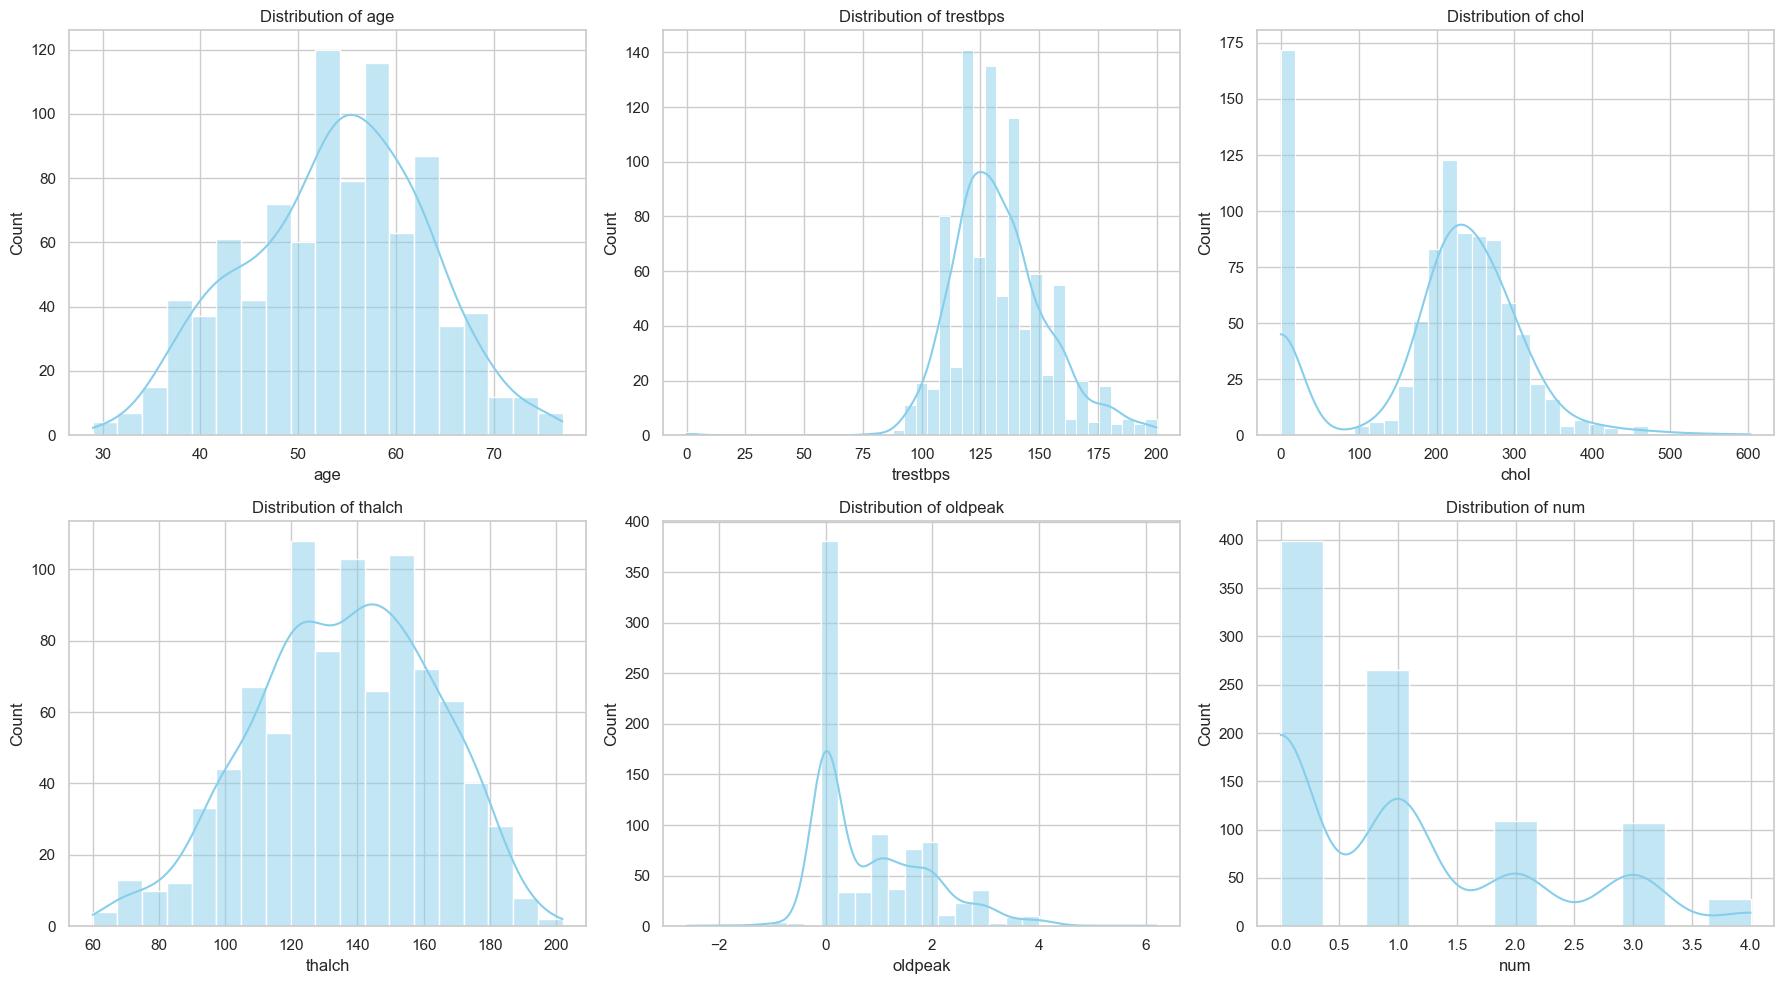

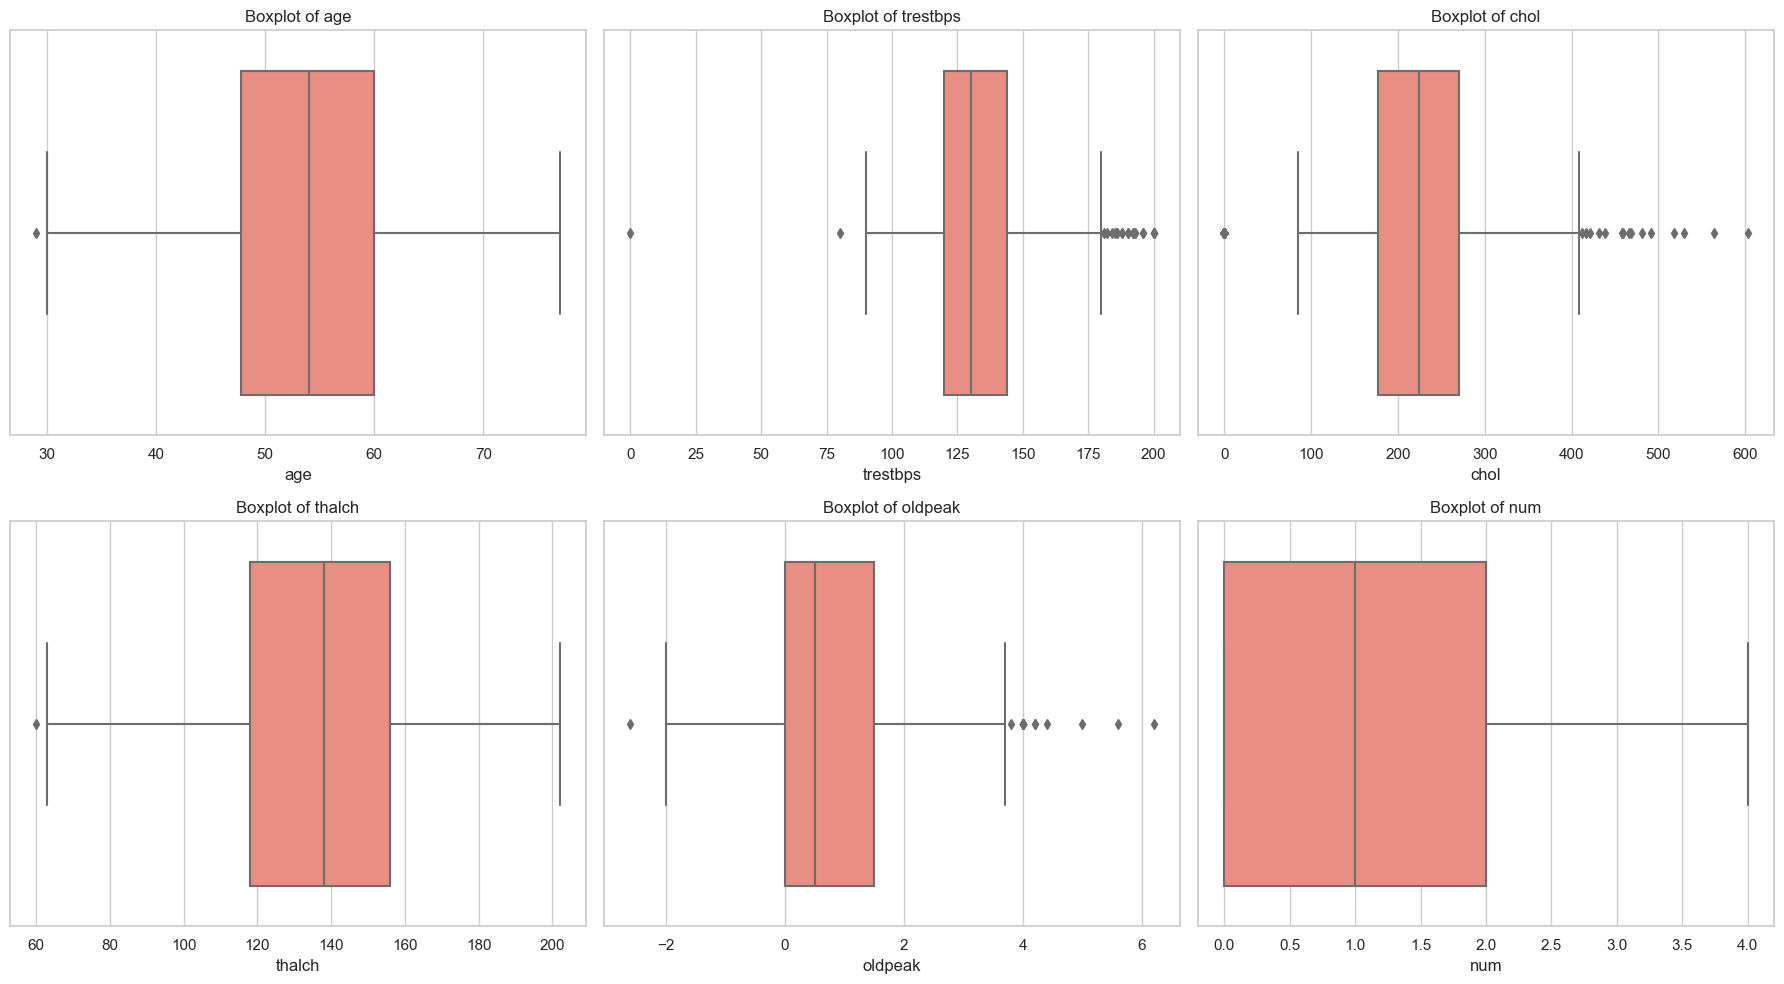

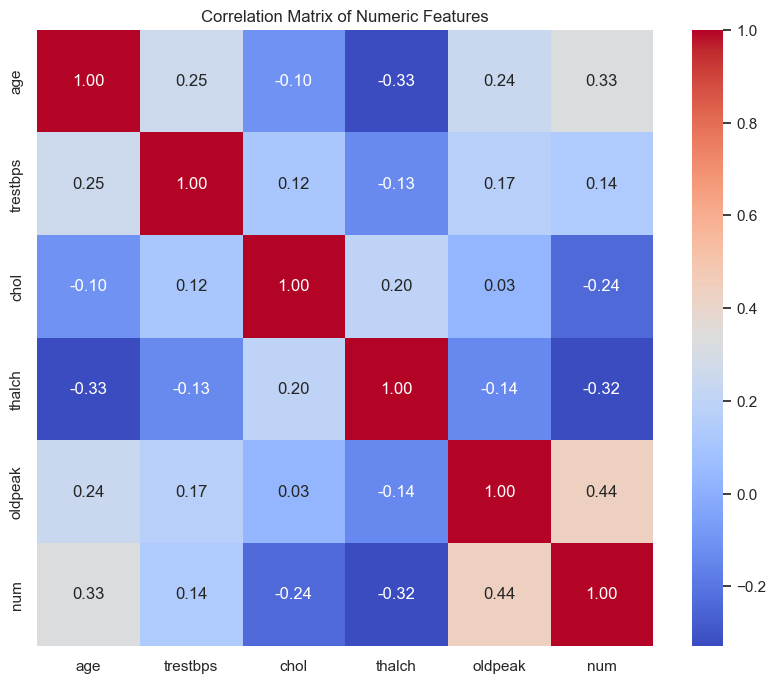

In [18]:
# Histograms for numeric features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='salmon')
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Correlation matrix
corr = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

### 3. Feature Engineering:
#### If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Copy the original dataset for transformation
df_clean = df.copy()

# --- Handling Missing Values ---
# Impute missing 'oldpeak' with the median
df_clean['oldpeak'].fillna(df_clean['oldpeak'].median(), inplace=True)

# --- Handling Invalid Values ---
# Replace 0 in 'trestbps' and 'chol' with NaN and impute with median
df_clean.loc[df_clean['trestbps'] == 0, 'trestbps'] = np.nan
df_clean.loc[df_clean['chol'] == 0, 'chol'] = np.nan
df_clean['trestbps'].fillna(df_clean['trestbps'].median(), inplace=True)
df_clean['chol'].fillna(df_clean['chol'].median(), inplace=True)

# --- Encoding Categorical Variables ---
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

# Apply Label Encoding for simplicity
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# --- Scaling Numeric Features ---
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.drop("num")
scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

# Show the cleaned and transformed dataset
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,0.514416,2.320276,0.574079,-0.251462,True,-1.561352,0.524183,-0.787899,1.354403,-1.672770,-1.514353,0
1,-1.397560,0.514416,0.232258,0.071656,-0.792352,False,0.013879,-0.147705,-0.787899,-0.815718,-0.224843,-1.514353,0
2,0.350503,0.514416,-0.811752,0.322867,-0.990678,False,0.013879,0.449529,-0.787899,-0.438305,-0.224843,-1.514353,0
3,-0.195767,0.514416,2.320276,-0.782462,-1.098856,False,-1.561352,2.017268,-0.787899,-0.815718,-0.224843,-1.514353,0
4,0.350503,0.514416,-0.811752,-1.184400,-0.828411,False,0.013879,-0.371668,0.961275,0.599578,-0.224843,-1.514353,0


### 4. Decision Tree Classification:
#### Split the dataset into training and testing sets (e.g., using an 80-20 split).
#### Implement a Decision Tree Classification model using a library like scikit-learn.
#### Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Load data
df = pd.read_csv('heart_disease.csv')

# --- Feature Engineering ---
# Fill missing 'oldpeak' with median
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

# Replace invalid values (0) in 'trestbps' and 'chol'
df.loc[df['trestbps'] == 0, 'trestbps'] = np.nan
df.loc[df['chol'] == 0, 'chol'] = np.nan
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
df['chol'].fillna(df['chol'].median(), inplace=True)

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature scaling
scaler = StandardScaler()
features = df.drop('num', axis=1)
target = df['num']
features_scaled = scaler.fit_transform(features)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# --- Train Decision Tree Classifier ---
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# --- Evaluation ---
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# For ROC-AUC, convert to binary if needed (e.g., 0 = no disease, 1+ = disease)
y_test_bin = (y_test > 0).astype(int)
y_pred_bin = (y_pred > 0).astype(int)
print("ROC-AUC (binary disease presence):", roc_auc_score(y_test_bin, y_pred_bin))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.521978021978022
Precision (macro): 0.32804878048780484
Recall (macro): 0.33284463938793085
F1 Score (macro): 0.3277176271914556
ROC-AUC (binary disease presence): 0.7314848375015102

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74        89
           1       0.39      0.33      0.36        48
           2       0.33      0.27      0.30        22
           3       0.21      0.29      0.24        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.33      0.33      0.33       182
weighted avg       0.51      0.52      0.51       182



### 5. Hyperparameter Tuning:
#### Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],   # different split criteria
    'max_depth': [3, 5, 10, 15, None],              # controls tree depth
    'min_samples_split': [2, 5, 10],                # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                  # minimum samples at a leaf node
    'max_features': [None, 'sqrt', 'log2']          # number of features to consider at split
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC for binary classification
y_test_bin = (y_test > 0).astype(int)
y_pred_bin = (y_pred > 0).astype(int)
print("ROC-AUC (binary):", roc_auc_score(y_test_bin, y_pred_bin))


Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.537184695323571
Test Accuracy: 0.5769230769230769
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.91      0.76        89
           1       0.43      0.50      0.46        48
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.58       182
   macro avg       0.22      0.28      0.25       182
weighted avg       0.44      0.58      0.50       182

ROC-AUC (binary): 0.7292497281623777


S:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
S:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
S:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. Model Evaluation and Analysis:
#### Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
#### Visualize the decision tree structure to understand the rules learned by the model and identify important features


#### Metric	Interpretation
#### Accuracy	Overall correctness of the model.
#### Precision	How many predicted positives are truly positive (low false positives).
#### Recall	How many actual positives were caught (low false negatives).
#### F1-score	Harmonic mean of precision and recall (good balance).
#### ROC-AUC	Discrimination capability between classes, esp. useful in binary classification.

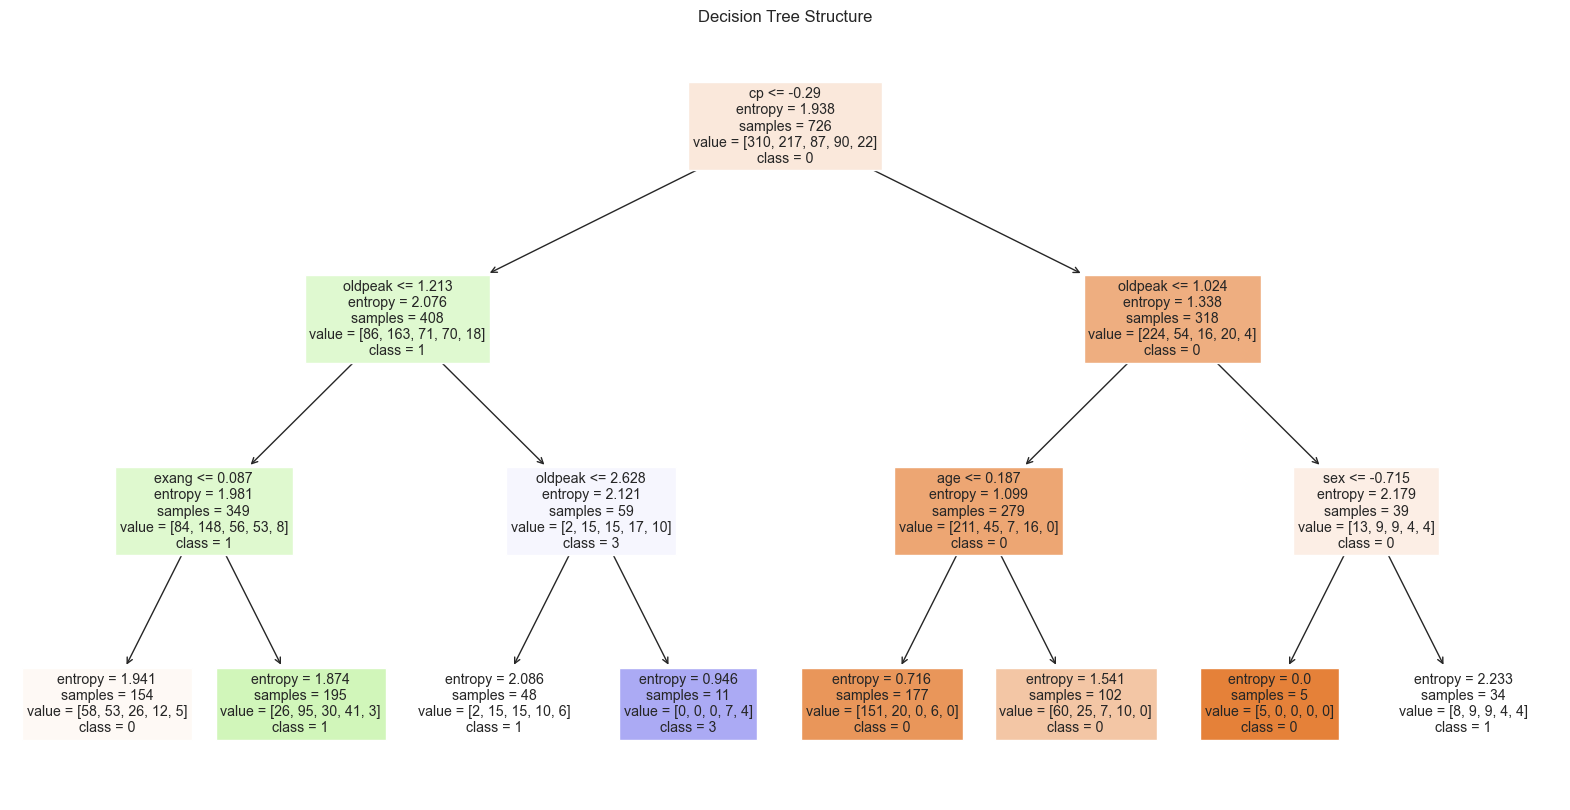

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get unique class labels and convert to strings
class_labels = [str(cls) for cls in sorted(y_train.unique())]

# Now plot the tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=features.columns.tolist(),
          class_names=class_labels, filled=True)
plt.title("Decision Tree Structure")
plt.show()

<Axes: title={'center': 'Feature Importances'}>

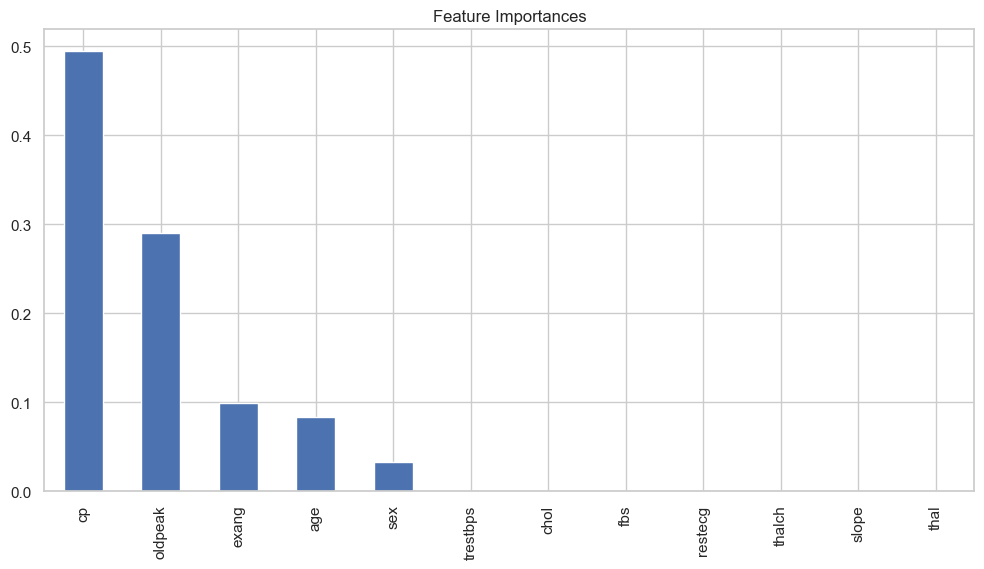

In [25]:
importances = pd.Series(best_model.feature_importances_, index=features.columns)
importances.sort_values(ascending=False).plot(kind='bar', title="Feature Importances")

# Interview Questions:
### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?


###  criterion
#### • Splitting function: 'gini', 'entropy', 'log_loss'
#### • Affects how splits are evaluated
#### • Minimal performance difference in most cases

###  max_depth
#### • Maximum depth of the tree
#### • Controls how complex the tree can get
#### • Too high → overfitting
#### • Too low → underfitting

###  min_samples_split
#### • Minimum number of samples required to split a node
#### • Higher values make the tree more conservative
#### • Helps prevent overfitting

###  min_samples_leaf
#### • Minimum samples required at a leaf node
#### • Larger values smooth the tree's output
#### • Reduces model complexity and overfitting

###  max_features
#### • Number of features to consider when looking for the best split
#### • Adds randomness; useful in ensemble methods
#### • Helps reduce variance

###  max_leaf_nodes
#### • Limits the number of leaf nodes
#### • Another way to prune the tree and simplify it
#### • Prevents overfitting

###  class_weight
#### • Assigns weights to classes (e.g., 'balanced')
#### • Useful for imbalanced datasets
#### • Gives more importance to minority classes

###  splitter
#### • Strategy to choose the split: 'best' or 'random'
#### • 'random' introduces randomness (sometimes used for ensemble diversity)

### 2. What is the difference between the Label encoding and One-hot encoding?



### Label Encoding
#### Converts categories into integers (e.g., Red → 0, Green → 1, Blue → 2).
#### Each category gets a unique numeric label.
#### Suitable for ordinal data (e.g., Low, Medium, High).

#### Pros:
#### Memory efficient.
#### Simple and fast.

#### Cons:
#### Introduces a false sense of order for nominal data.
#### May mislead models that interpret numeric relationships (e.g., linear regression).

### One-Hot Encoding
#### Converts categories into binary columns (dummy variables).
#### Each category is represented by a separate column with 0 or 1.
#### Suitable for nominal data (e.g., colors, countries).

#### Pros:
#### No ordinal relationship implied.
#### Safer for most models, especially linear ones.

#### Cons:
#### Increases dimensionality, especially with high-cardinality features.
#### Can lead to sparse data and higher memory usage.